log-like, TS: ../base_2D.hdf5 -1186732.85358 0.0
log-like, TS: mod_d_0_stripped.hdf5 -1186253.21957 -959.268009458
log-like, TS: mod_d_1_stripped.hdf5 -1186340.75419 -784.198779161
log-like, TS: mod_d_2_stripped.hdf5 -1186408.62079 -648.465570791
log-like, TS: mod_d_3_stripped.hdf5 -1186457.74102 -550.225112631
log-like, TS: mod_d_4_stripped.hdf5 -1186489.02523 -487.656692009
log-like, TS: mod_d_5_stripped.hdf5 -1186503.43697 -458.833220839
log-like, TS: mod_d_6_stripped.hdf5 -1186501.72882 -462.249511645
log-like, TS: mod_d_7_stripped.hdf5 -1186484.77608 -496.154992594
log-like, TS: mod_d_8_stripped.hdf5 -1186453.37035 -558.966456779
log-like, TS: mod_d_9_stripped.hdf5 -1186408.24893 -649.209288472


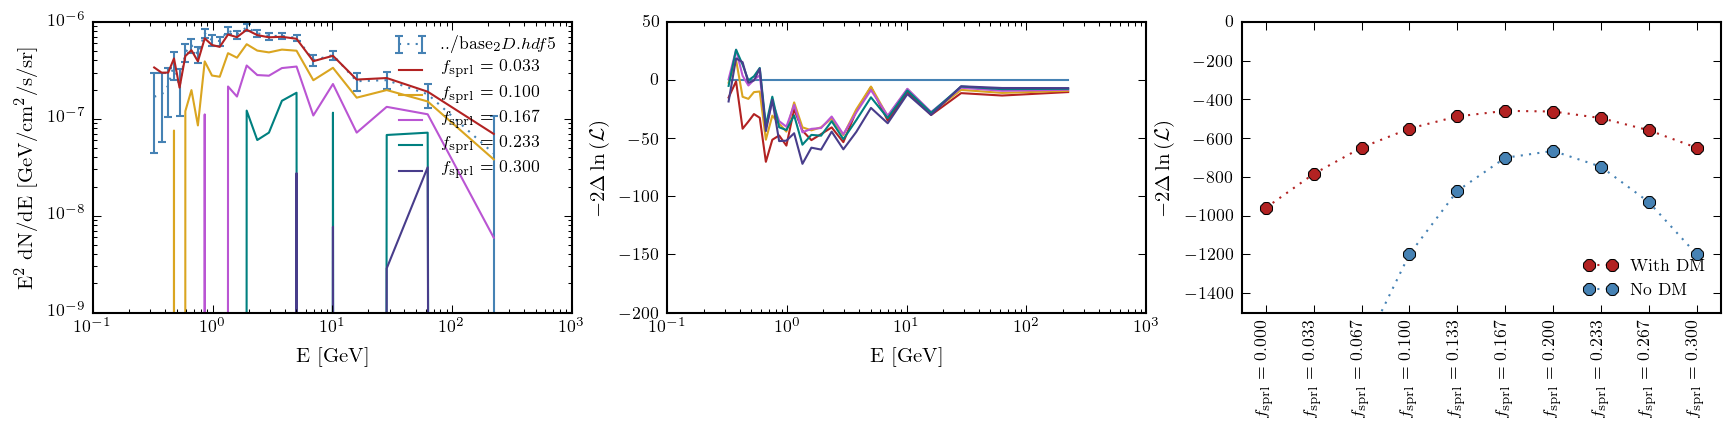

In [1]:
import cPickle as pickle
import h5py

def PlotSeries(start, stop, text,labels, ylim=None, mod=1):
    plt.figure(figsize=(14,2.5))
    models = ['../base_2D.hdf5'] + ['mod_d_%i_stripped.hdf5'%i for i in range(start, stop)]
    h_base = h5py.File('../base_2D.hdf5')
    fits = []
    ll, ll_no_dm = [], []

    
    for i, model in enumerate(models):
        try:
            h_base = h5py.File('../base_2D.hdf5')
            h = h5py.File('../mod_c/'+model)
            #try:
            h['/fit_results/GC/'].attrs.keys()
            fit = h['/fit_results/GC'].attrs
            fit_no_dm = h['/fit_results/GC_no_dm'].attrs
            print 'log-like, TS:', models[i], np.sum(fit['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total'])
            ll.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total']))
            ll_no_dm.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit_no_dm['loglike_total']))
            #print fit.keys()
            E, flux, stat = fit['energies'], fit['flux_DM'], fit['fluxunc_DM']
            
            plt.subplot(131)

            if i==0:
                plt.errorbar(E/1e3,E**2*flux/1e3,([E**2,E**2]*stat.T/1e3), 
                             label=model,capthick=1, capsize=2, ls=':' )
            elif i%mod==0:
                plt.errorbar(E/1e3,(E**2*flux/1e3), 
                             label=labels[i-1],capthick=1, capsize=2, ls='-' )

            plt.subplot(132)
            
            #print h_base['/fit_results/GC/'].attrs.keys()
            if i%mod==0:
                TS = 2*(h_base['/fit_results/GC/'].attrs['loglike']-fit['loglike'])
                plt.plot(E/1e3, TS)

        except:
            ll.append(-1e10)
            ll_no_dm.append(-1e-10)
            print 'no results found for model ', model
    
    
    plt.subplot(133)
    plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick', label='With DM')
    plt.plot(range(len(labels)), ll_no_dm[1:],marker='o',ls=':',color='steelblue',label='No DM')
    
    
    plt.subplot(131)
    plt.legend(frameon=False, fontsize=8)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    if 'spiral' in text:
        plt.yscale('symlog')
        plt.ylim(5e-8,2e-6)
    
    plt.subplot(132)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$')   
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.xscale('log')
    plt.ylim(-200,50)
            
    plt.subplot(133)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim is not None:
        plt.ylim(ylim)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)
    

#     for i in range(0,len(models)):
#         try:
#             plt.subplot(222)
#             fit = fits[i]
#             E, flux, stat = fit['energies'], fit['DM']['flux'], fit['DM']['fluxunc']
#             model = models[i].replace('_no_secondary','').replace('_','-')

#             plt.errorbar(E/1e3,flux/f0, label=model,capthick=1, capsize=2, ls='-' )

#             #plt.yscale('log')
#             plt.xscale('log')
#             plt.ylim(0,2)
#             plt.ylabel(r'GCE Ratio')
#             plt.xlabel(r'$\rm{E\ [GeV]}$')
#             #plt.legend(frameon=False, fontsize=8)

#             plt.subplot(223)


#             TS = -2*(np.array(fit['loglike'])-np.array(fits[0]['loglike']))
#             plt.plot(E/1e3, TS)
#             plt.ylabel('TS')
#             #print "TS:", TS
#             plt.xlabel(r'$\rm{E\ [GeV]}$')
#             plt.xscale('log')
#             plt.ylim(-400,50)
            
#         except:
#             pass
#     plt.subplot(223)
#     plt.text(10,-350,text)
    
#     for i in range(0,len(models)):
#         try:
#             plt.subplot(224)
#             plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick')
#             # You can specify a rotation for the tick labels in degrees or with keywords.
#             plt.xticks(range(len(labels)), labels, rotation='vertical')
#             plt.xlim(-.5, len(labels)-.5)
#             if ylim is not None:
#                 plt.ylim(ylim)
#             plt.ylabel(r'$-2\ln{(\mathcal{L})}$')            
#         except:
#             pass
    
    
    

#plt.errorbar(E/1e3,np.ones(len(E)),yerr=(np.abs(stat0[:,0])/f0,stat0[:,1]/f0), linestyle='')

# plt.xscale('log')
# plt.ylabel(r'$\rm{Ratio\ of\ GCE\ 3FGL/2FGL}$')
# plt.xlabel(r'$\rm{E\ [GeV]}$')

# plt.savefig('/home/carlson/Dropbox/plots/GCE_sys/GCE_3fgl_vs_2fgl.pdf')

PlotSeries(start=0, stop=10, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.3f$'%i for i in np.linspace(0,.30,10)], mod=2, ylim=(-1500,0))


log-like, TS: ../base_2D.hdf5 -1186732.85358 0.0
log-like, TS: mod_d_10_stripped.hdf5 -1186621.96123 -221.78469213
log-like, TS: mod_d_11_stripped.hdf5 -1186539.39393 -386.91928666
log-like, TS: mod_d_12_stripped.hdf5 -1186449.36304 -566.981082207
log-like, TS: mod_d_13_stripped.hdf5 -1186253.21957 -959.268009458
log-like, TS: mod_d_14_stripped.hdf5 -1185937.59653 -1590.51409633
log-like, TS: mod_d_15_stripped.hdf5 -1185464.81792 -2536.07131926
log-like, TS: mod_d_16_stripped.hdf5 no results found for model  mod_d_16_stripped.hdf5
log-like, TS: mod_d_17_stripped.hdf5 no results found for model  mod_d_17_stripped.hdf5
log-like, TS: mod_d_18_stripped.hdf5 no results found for model  mod_d_18_stripped.hdf5
log-like, TS: mod_d_19_stripped.hdf5 no results found for model  mod_d_19_stripped.hdf5
log-like, TS: mod_d_20_stripped.hdf5 no results found for model  mod_d_20_stripped.hdf5


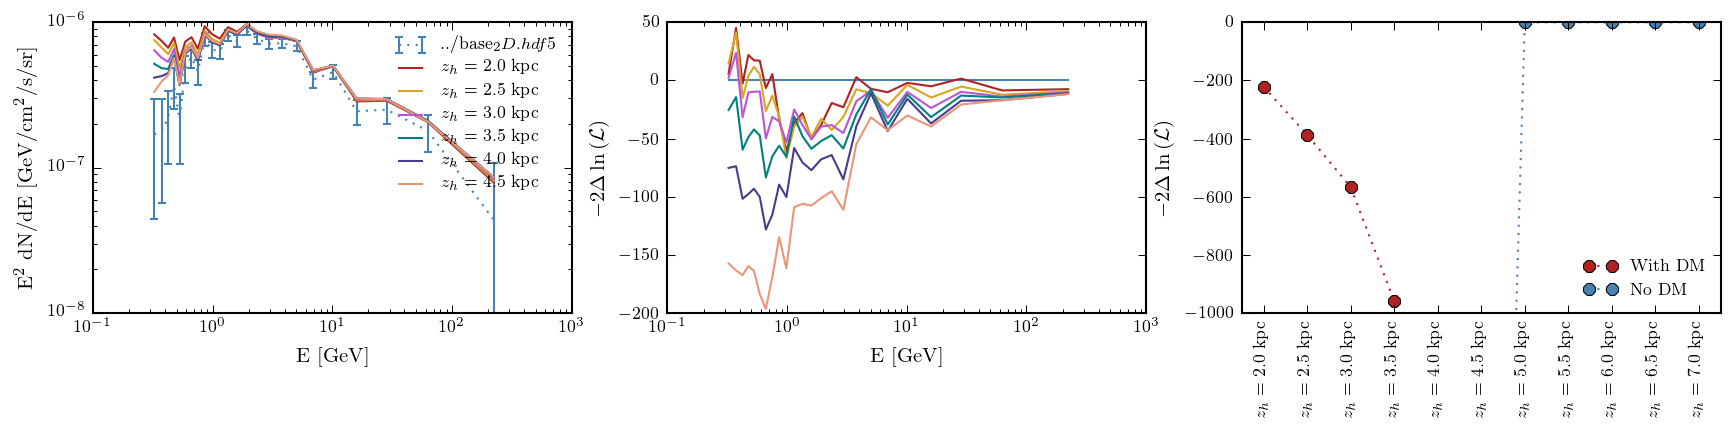

In [2]:
PlotSeries(start=10, stop=21, text='Halo Height', labels=[r'$z_h='+str(i)+'$ kpc' for i in np.linspace(2,7,11)], ylim=(-1000,0))

log-like, TS: ../base_2D.hdf5 -1186732.85358 0.0
log-like, TS: mod_d_21_stripped.hdf5 -1186065.86963 -1333.96790241
log-like, TS: mod_d_22_stripped.hdf5 -1186253.21957 -959.268009458
log-like, TS: mod_d_23_stripped.hdf5 -1185614.04174 -2237.62367435
log-like, TS: mod_d_24_stripped.hdf5 -1186380.0836 -705.539958648


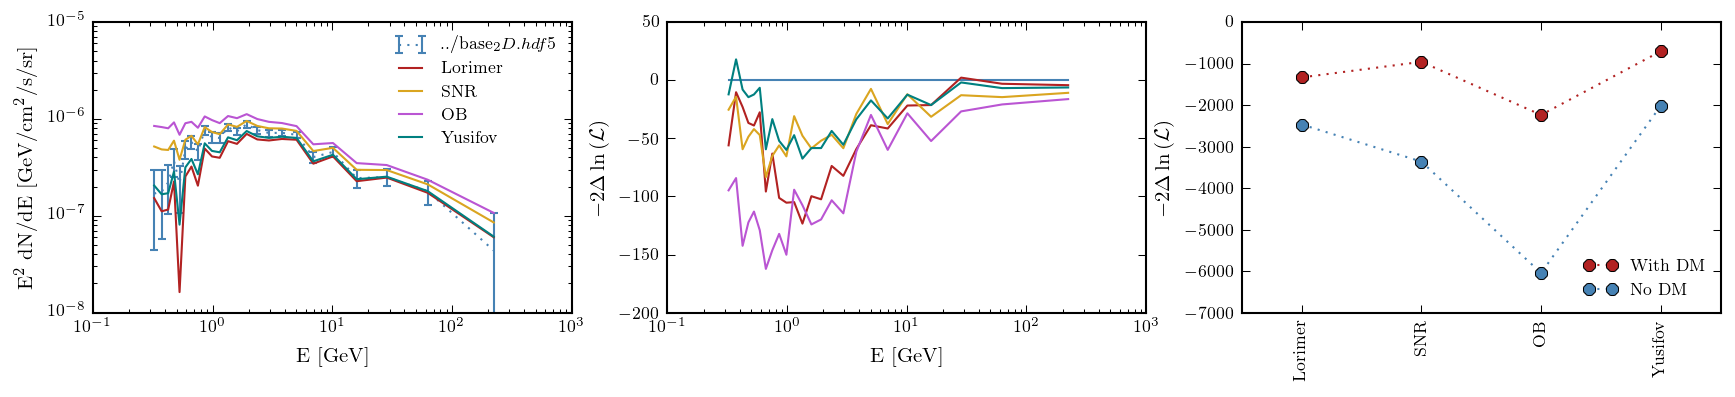

In [3]:
PlotSeries(start=21, stop=25, text='Primary CR Sources', labels=('Lorimer','SNR','OB','Yusifov'))

log-like, TS: ../base_2D.hdf5 -1186732.85358 0.0
log-like, TS: mod_d_25_stripped.hdf5 -1185572.06909 -2321.56896618
log-like, TS: mod_d_26_stripped.hdf5 -1183504.36457 -6456.97801209
log-like, TS: mod_d_27_stripped.hdf5 -1186253.21957 -959.268009458
log-like, TS: mod_d_28_stripped.hdf5 -1184177.31811 -5111.07093217


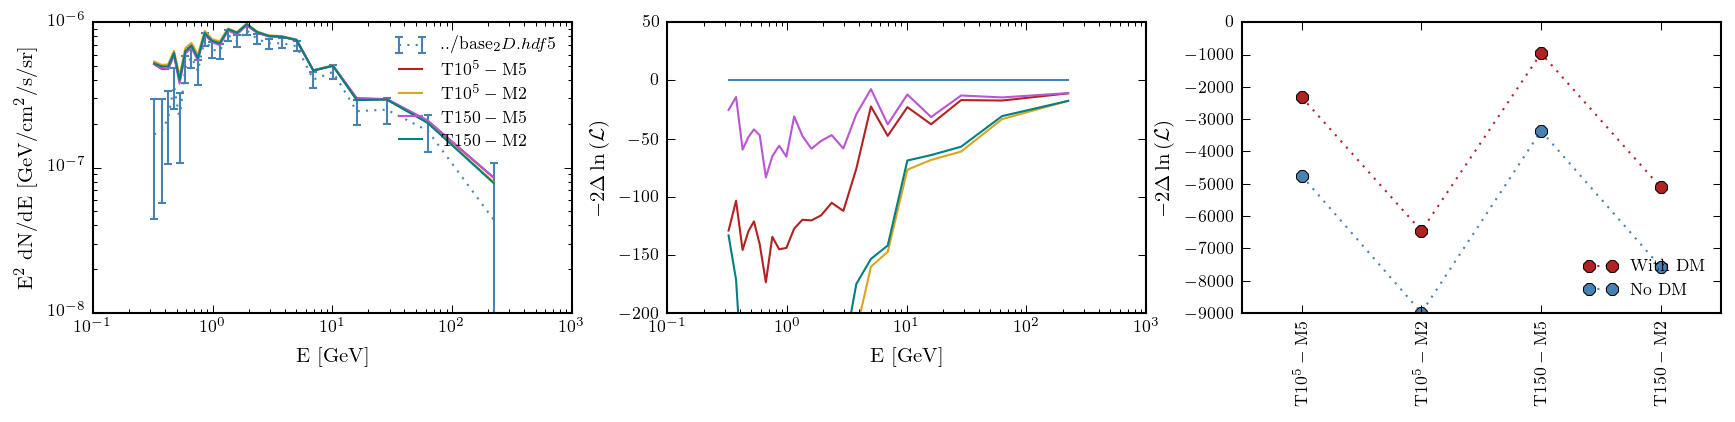

In [4]:
PlotSeries(start=25, stop=29, text=r'$\rm T_S$ and Mag(B-V)', labels=(r'$\rm T10^5-M5$',r'$\rm T10^5-M2$',r'$\rm T150-M5$',r'$\rm T150-M2$'))

log-like, TS: ../base_2D.hdf5 -1186732.85358 0.0
log-like, TS: mod_d_29_stripped.hdf5 -1182597.91134 -8269.88447772
log-like, TS: mod_d_30_stripped.hdf5 -1183105.47156 -7254.76402586
log-like, TS: mod_d_31_stripped.hdf5 no results found for model  mod_d_31_stripped.hdf5
log-like, TS: mod_d_32_stripped.hdf5 no results found for model  mod_d_32_stripped.hdf5
log-like, TS: mod_d_33_stripped.hdf5 -1186252.98725 -959.732653851
log-like, TS: mod_d_34_stripped.hdf5 -1186345.66227 -774.382613173
log-like, TS: mod_d_35_stripped.hdf5 -1186359.32108 -747.064997631
log-like, TS: mod_d_36_stripped.hdf5 -1186359.69294 -746.321275337


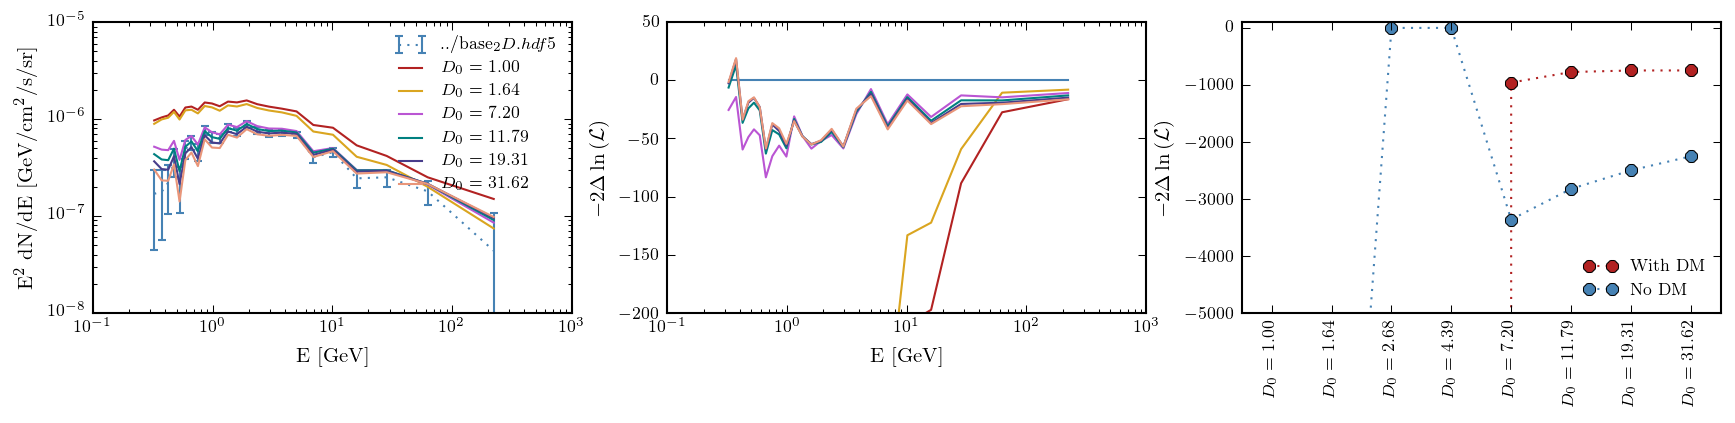

In [5]:
PlotSeries(start=29, stop=37, text=r'$\rm D_0\ [10^{28} cm^{3}s^{-1}]$', labels=['$D_0=%2.2f' % D + '$' for D in np.logspace(28,29.5,8)/1e28], ylim=(-5000,100))

log-like, TS: ../base_2D.hdf5 -1186732.85358 0.0
log-like, TS: mod_d_37_stripped.hdf5 -1186381.28867 -703.129812393
log-like, TS: mod_d_38_stripped.hdf5 -1186343.46341 -778.780340943
log-like, TS: mod_d_39_stripped.hdf5 -1186119.30428 -1227.09860225
log-like, TS: mod_d_40_stripped.hdf5 no results found for model  mod_d_40_stripped.hdf5
log-like, TS: mod_d_41_stripped.hdf5 no results found for model  mod_d_41_stripped.hdf5
log-like, TS: mod_d_42_stripped.hdf5 -1184681.82202 -4102.06311015
log-like, TS: mod_d_43_stripped.hdf5 -1184567.94939 -4329.80838147
log-like, TS: mod_d_44_stripped.hdf5 -1184562.40496 -4340.89723728


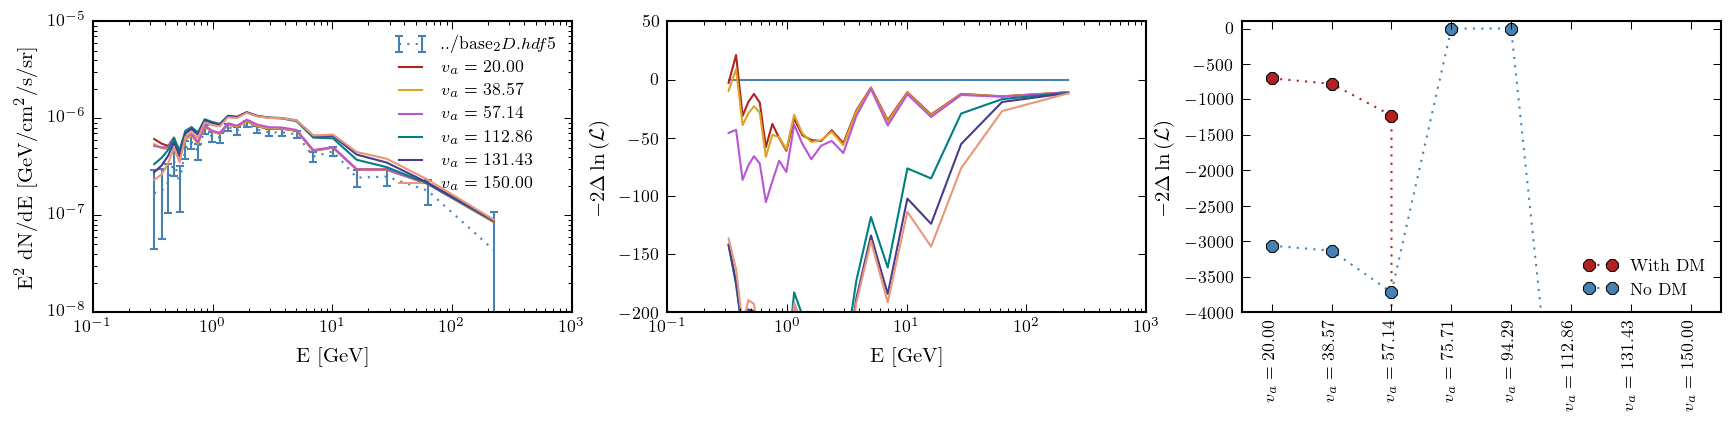

In [6]:
PlotSeries(start=37, stop=45, text=r'\noindent Alfven Velocity $v_A $\newline $\rm [km\ s^{-1}]$', labels=['$v_a=%2.2f' % v + '$' for v in np.linspace(20,150,8)], ylim=(-4000,100))

In [7]:
#PlotSeries(start=33, stop=39, text=r'\noindent Convection $dv/dz$\newline $\rm [km\ s^{-1}\ kpc^{-1}]$', labels=['$dvdz=%2.2f' % v + '$' for v in np.linspace(0,500,6)])

log-like, TS: ../base_2D.hdf5 -1186732.85358 0.0
log-like, TS: mod_d_45_stripped.hdf5 -1186434.86657 -595.974009763
log-like, TS: mod_d_46_stripped.hdf5 -1186413.40652 -638.894105555
log-like, TS: mod_d_47_stripped.hdf5 -1186359.37095 -746.965246891
log-like, TS: mod_d_48_stripped.hdf5 -1186292.35602 -880.995109871
log-like, TS: mod_d_49_stripped.hdf5 -1186229.01788 -1007.67138932
log-like, TS: mod_d_50_stripped.hdf5 -1186177.1621 -1111.38294505
log-like, TS: mod_d_51_stripped.hdf5 -1186138.23886 -1189.22943911
log-like, TS: mod_d_52_stripped.hdf5 -1186111.18024 -1243.34667136
log-like, TS: mod_d_53_stripped.hdf5 -1186094.38862 -1276.92992073
log-like, TS: mod_d_54_stripped.hdf5 -1186086.40053 -1292.90610148
log-like, TS: mod_d_55_stripped.hdf5 -1186086.07207 -1293.56301232


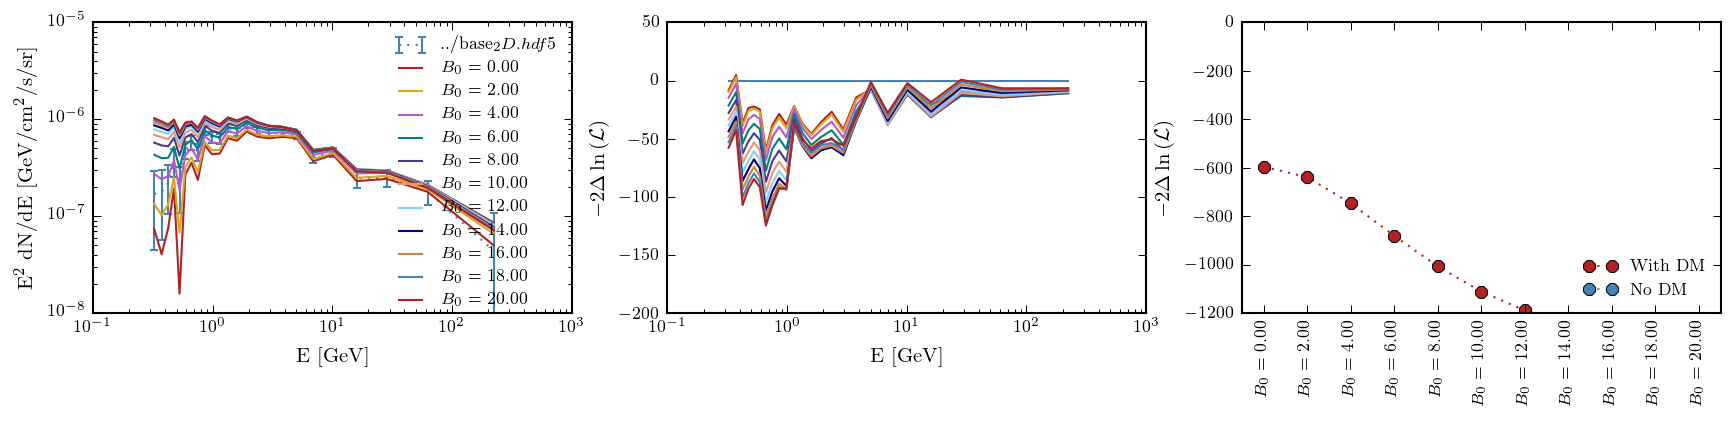

In [8]:
PlotSeries(start=45, stop=56, text=r'\noindent Magnetic Field $B_0\ \rm{[\mu G]}$', labels=['$B_0=%2.2f' % v + '$' for v in np.linspace(0,20,11)], ylim=(-1200,0))

In [9]:
#PlotSeries(start=47, stop=53, text=r'\noindent Magnetic Field $r_B$ $\rm [kpc]$', labels=['$r_b=%2.2f' % v + '$' for v in np.linspace(5,10,6)])

In [10]:
#PlotSeries(start=53, stop=59, text=r'\noindent Magnetic Field $z_B$ $\rm [kpc]$', labels=['$z_b=%2.2f' % v + '$' for v in np.linspace(1,4,6)])

In [11]:
#PlotSeries(start=69, stop=80, text=r'\noindent Source Spiral Fraction$', labels=[r'$f_{\rm sprl}=%2.2f' % v + '$' for v in np.linspace(0,.15,16)])

In [42]:
#PlotSeries(start=65, stop=73, text=r'\noindent ISRF OPT+FIR', labels=[r'$\rm isrf_{opt,fir}=%2.2f' % v + '$' for v in np.linspace(.5,3,8)])